Maira Zabuscha de Lima - 21008214

# Treino e Teste, Validação Cruzada e Regressão Linear

## Introdução

Trabalharemos com uma base de dados sobre [preços de imóveis em Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). 

Essa base possui um número grande de atributos descritos a seguir.

### Variável alvo

* SalePrice: O preço do imóvel em dólar. 


### Atributos

<table>
  <tbody>    
    <tr valign="top">
      <td valign="top">
        <ul>
          <li>MoSold: Mês da Venda</li>
          <li>YrSold: Ano da Venda</li><br>
          
          <li>SaleType: Tipo da venda</li>
          <li>SaleCondition: Condição da venda</li><br>

          <li>MSSubClass: O tipo de construção</li>
          <li>MSZoning: Classificação da região</li><br>

          <li>Neighborhood: Bairro</li>
          <li>Street: Tipo de via de acesso</li>
          <li>Alley: Tipo de via atrás da construção</li><br>

          <li>LotArea: Área em pés ao quadrado</li>
          <li>LotConfig: Configuração do loteamento</li>
          <li>LotFrontage: Comprimento da rua de acesso</li>
          <li>LotShape: Forma geral da propriedade</li><br>

          <li>LandSlope: Inclinação da propriedade</li>
          <li>LandContour: Contorno plano</li><br>

          <li>YearBuilt: Data original da construção</li>
          <li>YearRemodAdd: Data de reforma</li>
          <li>OverallQual: Material e qualidade de acabamento</li>
          <li>OverallCond: Nota de condições gerais</li><br>

          <li>Utilities: Tipo de serviços encontrados</li>
          <li>Foundation: Tipo de fundação</li>
          <li>Functional: Nota da funcionalidade</li><br>

          <li>BldgType: Tipo de moradia</li>
          <li>HouseStyle: Estilo de moradia</li><br>
          
          <li>1stFlrSF: Pés quadrados do primeiro andar</li>
          <li>2ndFlrSF: Pés quadrados do segundo andar</li>
          <li>LowQualFinSF: Acabamento de baixa qualidade por metro quadrado</li>
          <li>GrLivArea: Acima da média qualidade da área útil</li>
          <li>TotRmsAbvGrd: Total de quartos acima do solo</li><br>

          <li>Condition1: Proximidade a rodovia ou ferrovia</li>
          <li>Condition2: Proximidade a uma segunda rodovia ou fererovia</li><br>
          
          <li>RoofStyle: Tipo de telhado</li>
          <li>RoofMatl: Material do telhado</li><br>

          <li>ExterQual: Qualidade do material externo</li>
          <li>ExterCond: Condição atual do material externo</li>
          <li>Exterior1st: Cobertura exterior do imóvel</li>
          <li>Exterior2nd: Segundo tipo de cobertura exterior</li><br><br>
          
        </ul>
      </td>
      
      <td valign="top">
        <ul>
          <li>MasVnrType: Masonry veneer type</li>
          <li>MasVnrArea: Masonry veneer area in square feet</li><br>
          
          <li>WoodDeckSF: Wood deck area in square feet</li>
          <li>OpenPorchSF: Open porch area in square feet</li>
          <li>EnclosedPorch: Enclosed porch area in square feet</li>
          <li>3SsnPorch: Three season porch area in square feet</li>
          <li>ScreenPorch: Screen porch area in square feet</li><br>

          <li>PoolArea: Pool area in square feet</li>
          <li>PoolQC: Pool quality</li>
          <li>Fence: Fence quality</li>
          <li>PavedDrive: Paved driveway</li><br>

          <li>GarageType: Garage location</li>
          <li>GarageYrBlt: Year garage was built</li>
          <li>GarageFinish: Interior finish of the garage</li>
          <li>GarageCars: Size of garage in car capacity</li>
          <li>GarageArea: Size of garage in square feet</li>
          <li>GarageQual: Garage quality</li>
          <li>GarageCond: Garage condition</li><br>

          <li>Heating: Type of heating</li>
          <li>HeatingQC: Heating quality and condition</li>
          <li>CentralAir: Central air conditioning</li>
          <li>Electrical: Electrical system</li><br>
          
          <li>FullBath: Full bathrooms above grade</li>
          <li>HalfBath: Half baths above grade</li><br>
          
          <li>BedroomAbvGr: Number of bedrooms above basement level</li><br>
          
          <li>KitchenAbvGr: Number of kitchens</li>
          <li>KitchenQual: Kitchen quality</li><br>
          
          <li>Fireplaces: Number of fireplaces</li>
          <li>FireplaceQu: Fireplace quality</li><br>
          
          <li>MiscFeature: Miscellaneous feature not covered in other categories</li>
          <li>MiscVal: Value of miscellaneous feature</li><br>
          
          <li>BsmtQual: Height of the basement</li>
          <li>BsmtCond: General condition of the basement</li>
          <li>BsmtExposure: Walkout or garden level basement walls</li>
          <li>BsmtFinType1: Quality of basement finished area</li>
          <li>BsmtFinSF1: Type 1 finished square feet</li>
          <li>BsmtFinType2: Quality of second finished area (if present)</li>
          <li>BsmtFinSF2: Type 2 finished square feet</li>
          <li>BsmtUnfSF: Unfinished square feet of basement area</li>
          <li>BsmtFullBath: Basement full bathrooms</li>
          <li>BsmtHalfBath: Basement half bathrooms</li>
          <li>TotalBsmtSF: Total square feet of basement area</li>
        </ul>
      </td>
    </tr>
    
  </tbody>
</table>


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exercício 1

* Importe os dados usando Pandas e examine a dimensão da base. Existem 79 atributos mais o preditor, o preço de venda (`SalePrice`). 
* Existem três diferentes tipos: integers (`int64`), floats (`float64`), e strings (`object`, categóricos). Examine quantos existem de cada tipo. 

In [2]:
filepath = 'data/Ames_Housing_Sales.csv'
data = pd.read_csv(filepath, sep=',')
data.shape

(1379, 80)

In [3]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

## Exercício 2

Como discutido em aula, um desafio da área de Aprendizado de Máquina, principalmente quando lidamos com dados com muitos atributos, é garantir que cada coluna seja codificada corretamente.

Isso é particularmente verdade com atributos que são ordinais e categóricos sem ordem. Os categóricos sem ordem devem ser codificados de forma binária através do procedimento One-hot-encoding, porém isso costuma aumentar significativamente o total de atributos e cria atributos altamente correlacionados.

Determine o total de atributos de nossa base se todos os atributos categóricos fossem convertidos para binários. Lembre-se que para um atributo categórico com `n` valores, precisamos apenas de `n-1` atributos para representá-lo de forma binária.

In [4]:
# Selecione apenas os tipos object
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]

In [5]:
categorical_cols

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [6]:
# Determine quantos atributos seriam criados
# Dica: aplique (apply) o método nunique no dataframe nas colunas 
# categorical_cols
# opcionalmente ordene os valores utilizando sort_values
# verifique a saída
num_ohc_cols = data[categorical_cols].apply(pd.Series.nunique)
num_ohc_cols

Alley             3
BldgType          5
BsmtCond          4
BsmtExposure      5
BsmtFinType1      6
BsmtFinType2      7
BsmtQual          5
CentralAir        2
Condition1        9
Condition2        8
Electrical        5
ExterCond         4
ExterQual         4
Exterior1st      14
Exterior2nd      16
Fence             5
FireplaceQu       6
Foundation        6
Functional        7
GarageCond        5
GarageFinish      3
GarageQual        5
GarageType        6
Heating           6
HeatingQC         5
HouseStyle        8
KitchenQual       4
LandContour       4
LandSlope         3
LotConfig         5
LotShape          4
MSZoning          5
MasVnrType        4
MiscFeature       5
Neighborhood     25
PavedDrive        3
PoolQC            4
RoofMatl          8
RoofStyle         6
SaleCondition     6
SaleType          9
Street            2
Utilities         2
dtype: int64

In [7]:
n_cols = data.shape[1]
# Elimine do resultado toda coluna com apenas 1 valor categórico
n_cols = n_cols - num_ohc_cols.shape[0]
# Subtraia em um os valores
num_ohc_cols = num_ohc_cols - 1
# Faça a soma dos valores, a quantidade de novos atributos é significativo!
n_cols = n_cols + num_ohc_cols.sum()
n_cols

252

## Exercício 3

Vamos criar uma nova base de dados onde todos os atributos categóricos são binarizados pelo procedimento one-hot-encoding. Podemos testar como isso afeta o modelo de regressão.

* Usando o método `.copy()`  do dataframe, crie uma cópia para aplicar o one-hot encoding
* Nesse novo dataframe, aplique o LabelEncoder seguido do OneHotEncoder para gerar os novos atributos. Não se esqueça de aplicar o método `.drop()` nas colunas originais.
* Para a base original, aplique `.drop()` para todos os atributos categóricos.

Para gerar o one-hot-encoding das variáveis, primeiro aplicaremos o `LabelEncoder` do Scikit-Learn para transformar as strings em números de ids. Após esse procedimento, podemos aplicar o `OneHotEncoder` para gerar os novos atributos.

In [8]:
# Copia dos dados
data_ohc = data.copy()

# Vamos codificar
le = LabelEncoder()
ohc = OneHotEncoder()

# para cada coluna categórica
for col in num_ohc_cols.index:
    # Aplique o método .fit_transform do LabelEncoder e especifique 
    # .astype(np.int)
    # o reshape faz com que dat seja uma matriz multidimensional com 
    # uma coluna (ao invés de um vetor)
    dat = le.fit_transform(data_ohc[col]).astype(np.int).reshape(-1,1)
    
    # Remova a coluna col da base de dados
    data_ohc = data_ohc.drop(col,axis=1)
    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat).toarray()
    
    # Vamos criar novos nomes de colunas
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]
    
    # Cria um novo dataframe a partir de new_dat e col_names, utilize 
    # o índice de data_ohc
    new_df = pd.DataFrame(data=new_dat,index=data_ohc.index,columns=col_names)
    
    # Concatene data_ohc com new_df
    data_ohc = data_ohc.join(new_df)

data_ohc.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_3', 'SaleType_4', 'SaleType_5', 'SaleType_6', 'SaleType_7',
       'SaleType_8', 'Street_0', 'Street_1', 'Utilities_0', 'Utilities_1'],
      dtype='object', length=295)

In [9]:
# Calcule a diferença entre a quantidade de atributos da base original 
# e da base nova
data_ohc.shape[1] - data.shape[1]

215

In [10]:
#imprima as dimensões dos dados originais
print('original',data.shape)

# Remova as colunas categóricas do dataframe original
data_semcat = data.drop(categorical_cols,axis=1)

#imprima as dimensões dos dados originais, sem os atributos categóricos
print('sem os atributos categóricos',data_semcat.shape)

original (1379, 80)
sem os atributos categóricos (1379, 37)


## Exercício 4

* Crie separações entre treino e teste para ambas as bases de dados. Para garantir a mesma divisão, use o mesmo valor para o parâmetro `random_state` em cada separação.
* Para cada base de dados, aplique um modelo de Regressão Linear na base de treino.
* Calcule o erro quadrático médio para a base de treino e base de teste de cada modelo. Qual modelo gera um erro menor na base de teste? Por que?

In [11]:
y_col = 'SalePrice'

# Faça a divisão da base original utilizando test_size=0.3 e random_state=42
feature_cols = [x for x in data_semcat.columns if x != y_col]
X_data = data_semcat[feature_cols]
y_data = data_semcat[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Repita para a base data_ohc
feature_cols_ohc = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols_ohc]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, test_size=0.3, random_state=42)

In [12]:
# Vamos comparar se os índices são os mesmos, o resultado deve ser True
(X_train_ohc.index == X_train.index).all()

True

In [13]:
LR = LinearRegression()

# Lista para armazenar os erros das bases
error_df = list()

# Aplique .fit() na base de treino e predict na base de treino e teste
LR = LR.fit(X_train, y_train, sample_weight=None)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))

# Repita para a base data_ohc
LR = LR.fit(X_train_ohc, y_train_ohc, sample_weight=None)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))

# Juntar os resultados em uma tabela
error_df = pd.concat(error_df, axis=1)
error_df

,no enc,one-hot enc
test,1.372182e+09,1.802226e+17
train,1.131507e+09,3.177307e+08


Note que os valores de erro na base one-hot encoded são bem diferentes para o treino e teste. Isso ocorre pois os modelos com atributos categóricos gerarm um overfit da base. Na próxima lista tentaremos tratar esse problema conforme visto em sala de aula.

## Exercício 5

Para ambas as bases:

* Escale os atributos que não são categóricos (binários) utilizando um dos seguintes modelos: `StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`.
* Aplique novamente o modelo de regressão e recalcule os erros.

Não se esqueça que você deve aplicar o método `.fit_transform()` apenas na base de treino e o método `.transform()` na base de teste. Explique o porque.

- **R:** Porque ao aplicar o `.fit_transform()` já é executado o fit que calcula os valores para o scaling e em seguida é aplicado o transform nos dados de treino, então só fica faltando aplicar o `.transform()` nos dados de teste.

In [14]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [15]:
scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test),
    'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}

# Lista de colunas numéricas
mask = X_train.dtypes == np.float
float_columns = X_train.columns[mask]

# modelo de regressão
LR = LinearRegression()

# itera sobre todas as combinações de escala e bases
errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        # vamos fazer uma cópia para não bagunçar o original
        trainingset = _X_train.copy()
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        LR.fit(trainingset, _y_train, sample_weight=None)
        predictions = LR.predict(testset)
        key = encoding_label + ' - ' + scaler_label + 'scaling'
        errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
    print(key, error_val)

not_encoded - maxabsscaling          1.372345e+09
not_encoded - minmaxscaling          1.372477e+09
not_encoded - standardscaling        1.372182e+09
one_hot_encoded - maxabsscaling      8.065328e+09
one_hot_encoded - minmaxscaling      8.065328e+09
one_hot_encoded - standardscaling    2.098047e+27
--------------------------------------------------------------------------------
not_encoded - maxabsscaling 1372345364.21
not_encoded - minmaxscaling 1372476786.64
not_encoded - standardscaling 1372182358.93
one_hot_encoded - maxabsscaling 8065327607.21
one_hot_encoded - minmaxscaling 8065327607.33
one_hot_encoded - standardscaling 2.09804730223e+27


## Exercício 6

Plote os valores preditos vs valores reais para um dos modelos gerados

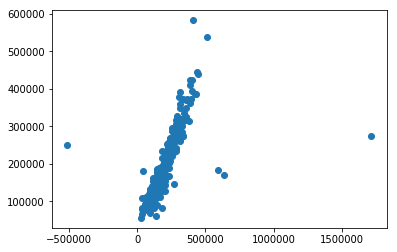

In [16]:
plt.plot(predictions,_y_test,ls ='',marker='o')